In [1]:
# download and unzip with Colab
!wget -O database.zip https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
!unzip database.zip

--2023-11-19 21:38:58--  https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
Resolving humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)... 195.220.108.28
Connecting to humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)|195.220.108.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘database.zip’

database.zip            [            <=>     ]   2.28G  11.6MB/s    in 3m 56s  

2023-11-19 21:42:54 (9.93 MB/s) - ‘database.zip’ saved [2452589021]

Archive:  database.zip
 extracting: ACDC/database/training/patient015/MANDATORY_CITATION.md  
 extracting: ACDC/database/training/patient015/patient015_frame10_gt.nii.gz  
 extracting: ACDC/database/training/patient015/patient015_frame10.nii.gz  
 extracting: ACDC/database/training/patient015/patient015_frame01_gt.nii.gz  
 extracting: ACDC/database/training/pat

In [2]:
!pip install pytorch_lightning
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 38.9 MB/s eta 0:00:00


In [3]:
# test code for .py
#!python download.py

In [4]:
# Test code for loading one file from .nii to numpy array

import nibabel as nib
import numpy as np
from scipy.ndimage import affine_transform

# Specify the path to the input .nii.gz file
input_nii_gz_file = 'ACDC/database/training/patient025/patient025_frame01.nii.gz'

# Load the NIfTI file
nifti_image = nib.load(input_nii_gz_file)

# Access the data and header information
nifti_data = nifti_image.get_fdata()
header = nifti_image.header

# Access the shape of the data (dimensions) like this:
data_shape = nifti_data.shape

# Access the header information, such as the voxel sizes:
voxel_sizes = header.get_zooms()

affine_matrix = nifti_image.affine
inverse_affine = np.linalg.inv(affine_matrix)
inverse_affine_short = inverse_affine[:3,:3]
scaled_data = affine_transform(nifti_data, inverse_affine_short, output_shape=(216, 304, 8))

# Print some information for demonstration
print(f"Data Shape: {data_shape}")
print(f"Voxel Sizes: {voxel_sizes}")

print(f"affine shape: {affine_matrix.shape}")
print(f"affine: {affine_matrix}")


print(f"Inverse affine shape: {inverse_affine.shape}")
print(f"Inverse affine: {inverse_affine}")

print(f"Scled data shape: {scaled_data.shape}")
print(f"Scled data: {scaled_data}")

print(f"Data shape: {nifti_data.shape}")
print(f"Data: {nifti_data}")


Data Shape: (256, 256, 9)
Voxel Sizes: (1.3671875, 1.3671875, 10.0)
affine shape: (4, 4)
affine: [[-1. -0.  0.  0.]
 [-0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Inverse affine shape: (4, 4)
Inverse affine: [[-1. -0. -0. -0.]
 [-0. -1. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Scled data shape: (216, 304, 8)
Scled data: [[[ 3.46019510e-17 -4.30666498e-18 -2.19931908e-19 ...  9.00630937e-21
   -7.04425354e-21 -2.00511898e-21]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 0.0000

Text(0.5, 0.98, 'Center slices for EPI image')

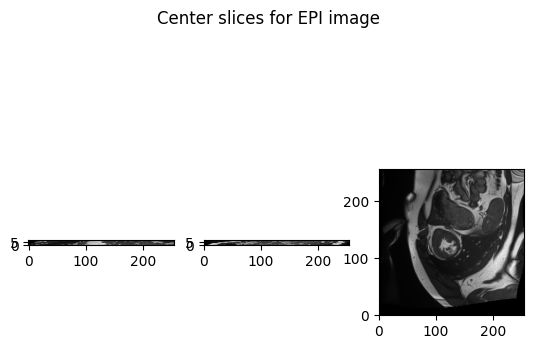

In [5]:
# Test code for data exploration, visualization

import matplotlib.pyplot as plt

def show_slices(slices):
   #Function to display row of image slices
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = nifti_data[110, :, :]
slice_1 = nifti_data[:, 150, :]
slice_2 = nifti_data[:, :, 6]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")


In [6]:
# Go through every folder and save the files into input-output numpy arrays

import os
import numpy as np
import nibabel as nib
from scipy.ndimage import affine_transform
from sklearn.model_selection import train_test_split

# Specify the path to the main folder containing 'test' and 'train' subfolders.
main_folder = 'ACDC/database'

# Initialize empty lists to store the data
input = []
output = []

#Function to load nifti image
def load_images(file_path):
  img = nib.load(file_path).get_fdata()
  return img

# Function to check if a file should be ignored
def should_ignore(file_name):
    return file_name == 'MANDATORY_CITATION.md'

# Iterate through 'test' and 'train' folders
for folder_name in ['testing', 'training']:
    if not should_ignore(folder_name):
      folder_path = os.path.join(main_folder, folder_name)
      patient_folders = os.listdir(folder_path)

      # Iterate through patient folders
      for patient_folder in patient_folders:
        if not should_ignore(patient_folder):
          patient_path = os.path.join(folder_path, patient_folder)
          files = os.listdir(patient_path)

          # Iterate through files in each patient folder
          for file_name in files:
            file_path = os.path.join(patient_path, file_name)

            if file_name.endswith('.nii.gz') & ('4d' not in file_name):
              #Separate the gt and non-gt files
              if 'gt' in file_name:
                gt_img = load_images(file_path)
                output.append([folder_name, gt_img])
              else:
                img = load_images(file_path)
                input.append([folder_name, img])

input_array = np.array(input)
output_array = np.array(output)

<ipython-input-6-88a13b6a0418>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_array = np.array(input)
<ipython-input-6-88a13b6a0418>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_array = np.array(output)


In [7]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [8]:
print(f"input shape: {input_array.shape}")
print(f"output shape: {output_array.shape}")
print(f"input folders: {input_array[:10,0]}")
print(f"input data: {input_array[:3,1]}")
print(f"output data: {output_array[:3,1]}")

input shape: (300, 2)
output shape: (300, 2)
input folders: ['testing' 'testing' 'testing' 'testing' 'testing' 'testing' 'testing'
 'testing' 'testing' 'testing']
input data: [array([[[19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         ...,
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.]],

        [[19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         ...,
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.]],

        [[19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         [19., 19., 19., ..., 19., 19., 17.],
         ...,
         [22., 30., 81., ..., 46., 35., 37.],
         [22., 31., 91., ..., 46., 34., 35.

In [9]:
from sklearn.model_selection import train_test_split

print(f"Input array shape: {input_array.shape}")

input_train = input_array[np.where(input_array[:, 0] == 'training')]
output_train = output_array[np.where(output_array[:, 0] == 'training')]

print(f"Input train shape: {input_train.shape}")
print(f"Output train shape: {output_train.shape}")

input_test = input_array[np.where(input_array[:, 0] == 'testing')]
output_test = output_array[np.where(output_array[:, 0] == 'testing')]
input_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)

print(f"Input validation shape: {input_val.shape}")
print(f"Output validation shape: {output_val.shape}")
print(f"Input test shape: {input_test.shape}")
print(f"Output test shape: {output_test.shape}")

Input array shape: (300, 2)
Input train shape: (200, 2)
Output train shape: (200, 2)
Input validation shape: (60, 2)
Output validation shape: (60, 2)
Input test shape: (40, 2)
Output test shape: (40, 2)


In [10]:
# NEW PADDING


import numpy as np

# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)
print(largest_input_shape, largest_output_shape)

# Function to pad and process a batch of arrays
def process_batch(array, largest_shape, batch_size):
    padded_arrays = []
    for i in range(0, len(array), batch_size):
        batch = array[i:i + batch_size]
        batch_padded = []
        for name, arr in batch:
            max_shape = np.maximum(largest_shape, arr.shape)
            pad_width = [(0, max_dim - curr_dim) for max_dim, curr_dim in zip(max_shape, arr.shape)]
            padded_arr = np.pad(arr, pad_width, mode='constant')
            batch_padded.append((name, padded_arr))
        padded_arrays.extend(batch_padded)
    return padded_arrays

[428 512  21] [428 512  21]


In [11]:
input_array.shape

(300, 2)

In [12]:
input_array[0,1].shape

(216, 256, 9)

In [13]:
import numpy as np

# Assuming input_array has text in the first column and 3D images in the second column
# Function to slice 3D images along the third axis and create 2D images
def slice_3d_images(input_array):
    sliced_images = []
    for text, image_3d in input_array:
        for i in range(image_3d.shape[2]):
            image_2d = image_3d[:, :, i].astype('float16')
            sliced_images.append(image_2d)
    return np.array(sliced_images)


In [14]:
# Slice 3D images to get 2D images
sliced_input_train = slice_3d_images(input_train)
sliced_input_val = slice_3d_images(input_val)
sliced_input_test = slice_3d_images(input_test)

sliced_output_train = slice_3d_images(output_train)
sliced_output_val = slice_3d_images(output_val)
sliced_output_test = slice_3d_images(output_test)

print(sliced_input_train.shape)
print(sliced_input_val.shape)
print(sliced_input_test.shape)
print(sliced_output_train.shape)
print(sliced_output_val.shape)
print(sliced_output_test.shape)

<ipython-input-13-234c5cfe96c0>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sliced_images)


(1902,)
(616,)
(460,)
(1902,)
(616,)
(460,)


In [15]:
sliced_input_train = sliced_input_train[:100]
sliced_output_train = sliced_output_train[:100]
sliced_input_val = sliced_input_val[:40]
sliced_output_val = sliced_output_val[:40]
sliced_input_test = sliced_input_test[:40]
sliced_output_test = sliced_output_test[:40]

# Padding

In [16]:
sliced_inputs_all = np.concatenate((sliced_input_train, sliced_input_val, sliced_input_test))
print(f"sliced_inputs_all shape: {sliced_inputs_all.shape}")

sliced_inputs_all shape: (180,)


In [17]:
max_width = max(image.shape[1] for image in sliced_inputs_all)
max_height = max(image.shape[0] for image in sliced_inputs_all)

print(f"Max width: {max_width}, Max height: {max_height}")

Max width: 256, Max height: 256


In [18]:
# Round up the maximum height to be divisible by 32
padded_height = ((max_height - 1) // 32 + 1) * 32
print(f"Padded height (to be divisible by 32): {padded_height}")

Padded height (to be divisible by 32): 256


In [19]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_train.shape)  # The shape will be (total_2d_images, padded_height, padded_width)

(100, 256, 256)


In [20]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_train.shape)

(100, 256, 256)


In [21]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_val.shape)

(40, 256, 256)


In [22]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_val.shape)

(40, 256, 256)


In [23]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_test.shape)

(40, 256, 256)


In [24]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_test.shape)

(40, 256, 256)


In [25]:
# Set your batch size
# batch_size = 10

# padded_input_train = []
# padded_input_val = []
# padded_input_test = []
# padded_output_train = []
# padded_output_val = []
# padded_output_test = []

# i = 0
# for j in range(20, len(input_train) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_train.append(process_batch(input_train[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_train length: {j}")

# i = 0
# for j in range(20, len(input_val) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_val.append(process_batch(input_val[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_val length: {j}")

# i = 0
# for j in range(20, len(input_test) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_test.append(process_batch(input_test[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_test length: {j}")


# i = 0
# for j in range(20, len(output_train) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_train.append(process_batch(output_train[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_train length: {j}")

# i = 0
# for j in range(20, len(output_val) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_val.append(process_batch(output_val[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_val length: {j}")

# i = 0
# for j in range(20, len(output_test) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_test.append(process_batch(output_test[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_test length: {j}")

In [26]:
# Set your batch size
# batch_size = 2

# # padded_inputs = process_batch(input_array[:60,:], largest_input_shape, batch_size)

# padded_inputs = []
# i = 0
# for j in range(50,300,50): # CHANGE 300 TO 301 IF NOT RUN IN COLAB!!!!!!!!!!!!
#   # Convert the list of lists to a NumPy array
#   padded_inputs.append(process_batch(input_array[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"Input length: {j}")


# padded_outputs = []
# i = 0
# for j in range(50,300,50): # CHANGE 300 TO 301 IF NOT RUN IN COLAB!!!!!!!!!!!!
#   # Convert the list of lists to a NumPy array
#   padded_outputs.append(process_batch(output_array[i:j, :], largest_output_shape, batch_size))
#   i = j
#   print(f"Output length: {j}")


# Convert the list of lists to a NumPy array
# padded_inputs_test = np.array([item[1] for item in padded_inputs_test])

"""
# Process the input data in smaller steps
padded_inputs = process_batch(input_array, largest_input_shape, batch_size)

# Process the output data in smaller steps
padded_outputs = process_batch(output_array, largest_output_shape, batch_size)
"""

'\n# Process the input data in smaller steps\npadded_inputs = process_batch(input_array, largest_input_shape, batch_size)\n\n# Process the output data in smaller steps\npadded_outputs = process_batch(output_array, largest_output_shape, batch_size)\n'

In [27]:
# from itertools import chain

# def flatten_chain(matrix):
#   return list(chain.from_iterable(matrix))

# padded_inputs = np.array(flatten_chain(padded_inputs))
# padded_outputs = np.array(flatten_chain(padded_outputs))

In [28]:
# for item in padded_inputs:
#   print(item)
#   print(len(item))

# print(padded_inputs)

In [29]:
# print(len(padded_inputs))
# print(padded_inputs[0][1])

In [30]:
# for i, data in enumerate(padded_inputs):
#   # for j, data2 in enumerate(data):
#      print(f"Image {i + 1} shape: {data[1].shape}")

In [31]:
#Separate the inputs and outputs into train-test-val arrays

"""
from sklearn.model_selection import train_test_split

print(f"Input array shape: {padded_inputs.shape}")

input_train = padded_inputs[np.where(padded_inputs[:, 0] == 'training')]
output_train = padded_outputs[np.where(padded_outputs[:, 0] == 'training')]

print(f"Input train shape: {input_train.shape}")
print(f"Output train shape: {output_train.shape}")

input_test = padded_inputs[np.where(padded_inputs[:, 0] == 'testing')]
output_test = padded_outputs[np.where(padded_outputs[:, 0] == 'testing')]
input_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)

print(f"Input validation shape: {input_val.shape}")
print(f"Output validation shape: {output_val.shape}")
print(f"Input test shape: {input_test.shape}")
print(f"Output test shape: {output_test.shape}")
"""

'\nfrom sklearn.model_selection import train_test_split\n\nprint(f"Input array shape: {padded_inputs.shape}")\n\ninput_train = padded_inputs[np.where(padded_inputs[:, 0] == \'training\')]\noutput_train = padded_outputs[np.where(padded_outputs[:, 0] == \'training\')]\n\nprint(f"Input train shape: {input_train.shape}")\nprint(f"Output train shape: {output_train.shape}")\n\ninput_test = padded_inputs[np.where(padded_inputs[:, 0] == \'testing\')]\noutput_test = padded_outputs[np.where(padded_outputs[:, 0] == \'testing\')]\ninput_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)\n\nprint(f"Input validation shape: {input_val.shape}")\nprint(f"Output validation shape: {output_val.shape}")\nprint(f"Input test shape: {input_test.shape}")\nprint(f"Output test shape: {output_test.shape}")\n'

In [32]:
# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)

print(largest_input_shape, largest_output_shape)

[428 512  21] [428 512  21]


In [33]:
# Find the smallest shape among all the arrays
smallest_input_shape = np.min([arr.shape for _, arr in input_array], axis=0)
smallest_output_shape = np.min([arr.shape for _, arr in output_array], axis=0)

print(smallest_input_shape, smallest_output_shape)

[154 154   6] [154 154   6]


In [34]:
train_dataset = np.stack((padded_input_train, padded_output_train), axis=0)
val_dataset = np.stack((padded_input_val, padded_output_val), axis=0)
test_dataset = np.stack((padded_input_test, padded_output_test), axis=0)

print(train_dataset.shape)
print(val_dataset.shape)
print(test_dataset.shape)

(2, 100, 256, 256)
(2, 40, 256, 256)
(2, 40, 256, 256)


In [35]:
print(type(train_dataset))

<class 'numpy.ndarray'>


In [36]:
# train_dataset = torch.tensor(train_dataset)
# val_dataset = torch.tensor(val_dataset)
# test_dataset = torch.tensor(test_dataset)

# print(train_dataset.shape)
# print(val_dataset.shape)
# print(test_dataset.shape)

In [37]:
# for image in train_dataset[:,0]:
#   print(image)

In [38]:
import torch
import pytorch_lightning as pl
import torchvision
from torchvision import transforms
import torchmetrics
from PIL import Image

# Hyperparameters

In [39]:
padding = 358
max_height = 442
max_width = 512

resolution = 112
num_classes = 2

batch_size = 8
num_workers = 2
num_epochs = 10
learning_rate = 3e-4
weight_decay = 1e-4
width = 64

# Data Module

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pytorch_lightning as pl

class ImageDataset(Dataset):
    def __init__(self, data_array, transform=None):
        self.data_array = data_array
        self.transform = transform

    def __len__(self):
        return self.data_array.shape[1]

    def __getitem__(self, index):
        image = self.data_array[0, index]
        label = self.data_array[1, index]

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return {"image": image, "label": label}

class MyDataModule(pl.LightningDataModule):
    def __init__(self, train_dataset, val_dataset, test_dataset, batch_size, max_height, max_width):
        super().__init__()
        self.train_dataset, self.val_dataset, self.test_dataset = train_dataset, val_dataset, test_dataset
        self.batch_size = batch_size
        self.max_height, self.max_width = max_height, max_width

    def setup(self, stage=None):
      self.train_dataset = torch.tensor(self.train_dataset)
      self.val_dataset = torch.tensor(self.val_dataset)
      self.test_dataset = torch.tensor(self.test_dataset)

    def train_dataloader(self):
        return DataLoader(
            ImageDataset(self.train_dataset),
            batch_size=self.batch_size,
            num_workers=num_workers,
            pin_memory=True,
            drop_last=True,
            shuffle=True)

    def val_dataloader(self):
        return DataLoader(
            ImageDataset(self.val_dataset),
            batch_size=self.batch_size,
            num_workers=num_workers,
            pin_memory=True)

    def test_dataloader(self):
        return DataLoader(
            ImageDataset(self.test_dataset),
            batch_size=self.batch_size)

    def transfer_to_device(self, device):
        self.train_dataset.to(device)
        self.val_dataset.to(device)
        self.test_dataset.to(device)


In [41]:
datamodule = MyDataModule(train_dataset, val_dataset, test_dataset, batch_size=batch_size, max_height=max_height, max_width=max_width)
datamodule.prepare_data()
datamodule.setup()

In [42]:
# Access dataloaders
train_dataloader = datamodule.train_dataloader()
val_dataloader = datamodule.val_dataloader()
test_dataloader = datamodule.test_dataloader()

In [43]:
len(train_dataloader)

12

In [44]:
# Iterate over batches and perform training
for batch in train_dataloader:
    image, label = batch["image"].unsqueeze(1), batch["label"].unsqueeze(1)
    print("Image Batch shape after padding:", image.shape)
    print("Label Batch shape after padding:", label.shape)
    # print(len(batch["image"]))
    # for image in batch["image"]:
    #   print(image[0])

Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])
Image Ba

In [45]:
# def visualize_images(dataset, num_images, num_augmentations):
#     plt.figure(figsize=(num_augmentations * 2, num_images * 2))
#     for row in range(num_images):
#         for column in range(num_augmentations):
#             image = dataset[row][0][4]
#             label = dataset[row][1][4]
#             plt.subplot(num_images, num_augmentations, num_augmentations * row + column + 1)
#             plt.imshow(image)
#             plt.axis("off")
#     plt.tight_layout()
#     plt.show()

In [46]:
# visualize_images(datamodule.train_dataset, num_images=4, num_augmentations=5)

In [47]:
# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl

class UNet(pl.LightningModule):
    def __init__(self, in_channels):
        super(UNet, self).__init__()

        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Middle
        self.middle = self.conv_block(512, 1024)

        # Decoder
        self.dec4 = self.conv_block(1024, 512)
        self.dec3 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec1 = self.conv_block(128, 64)

        # Final convolutional layer
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)  # Output 1 channel

        # Sigmoid activation for binary segmentation
        self.sigmoid = nn.Sigmoid()

        # Define Binary Cross Entropy Loss and optimizer
        self.bce_loss = nn.BCEWithLogitsLoss()
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def upsample_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)

        print("enc3 size:", enc3.size())
        print("enc4 size:", enc4.size())

        # Middle
        middle = self.middle(enc4)

        # Decoder with skip connections
        dec4 = self.upsample_block(1024, 512)(middle)
        print("dec4 size:", dec4.size())
        print("enc4 size:", enc4.size())
        dec4 = torch.cat([dec4, enc4[:, :, :dec4.size(2), :dec4.size(3)]], dim=1)  # Adjust the size here

        dec4 = self.dec4(dec4)

        # Decoder with skip connections
        dec3 = self.upsample_block(512, 256)(dec4)
        print("dec3 size:", dec3.size())
        print("enc3 size:", enc3.size())
        dec3 = torch.cat([dec3, enc3[:, :, :dec3.size(2), :dec3.size(3)]], dim=1)  # Adjust the size here
        dec3 = self.dec3(dec3)

        dec2 = self.upsample_block(256, 128)(dec3)
        dec2 = torch.cat([dec2, enc2], dim=1)  # Check the size here
        dec2 = self.dec2(dec2)

        dec1 = self.upsample_block(128, 64)(dec2)
        dec1 = torch.cat([dec1, enc1], dim=1)  # Check the size here
        dec1 = self.dec1(dec1)

        # Final convolutional layer
        x_out = self.final_conv(dec1)

        # Sigmoid activation for binary segmentation
        x_out = self.sigmoid(x_out)

        return x_out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch["image"].unsqueeze(1), batch["label"].unsqueeze(1)
        inputs, targets = inputs.float(), targets.float()
        outputs = self(inputs)
        loss = self.bce_loss(outputs, targets)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch["image"].unsqueeze(1), batch["label"].unsqueeze(1)
        inputs, targets = inputs.float(), targets.float()
        outputs = self(inputs)
        val_loss = self.bce_loss(outputs, targets)
        return val_loss

    def on_validation_epoch_end(self, outputs):
        avg_val_loss = torch.stack(outputs).mean()
        self.log('val_loss', avg_val_loss, prog_bar=True)

    def test_step(self, batch, batch_idx):
        inputs, targets = batch["image"].unsqueeze(1), batch["label"].unsqueeze(1)
        inputs, targets = inputs.float(), targets.float()
        outputs = self(inputs)
        test_loss = self.bce_loss(outputs, targets)
        return test_loss

    def test_epoch_end(self, outputs):
        avg_test_loss = torch.stack(outputs).mean()
        self.log('test_loss', avg_test_loss, prog_bar=True)

    def configure_optimizers(self):
        return self.optimizer


In [73]:
# Instantiate the UNetPretrained model with Focal Loss
unet_model = UNet(1)

#unet_model.to(device)
datamodule.transfer_to_device(device)
# Instantiate PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=5)
# Train the model
trainer.fit(unet_model, datamodule)

# Evaluate on the test set
trainer.test(unet_model, datamodule=datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
<ipython-input-40-8f973af41221>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.train_dataset = torch.tensor(self.train_dataset)
<ipython-input-40-8f973af41221>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.val_dataset = torch.tensor(self.val_dataset)
<ipython-input-40-8f973af41221>:34: UserWarning: To copy construct from a tensor, it is recommended to use so

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

enc3 size: torch.Size([8, 256, 32, 32])
enc4 size: torch.Size([8, 512, 16, 16])
dec4 size: torch.Size([8, 512, 16, 16])
enc4 size: torch.Size([8, 512, 16, 16])
dec3 size: torch.Size([8, 256, 16, 16])
enc3 size: torch.Size([8, 256, 32, 32])


RuntimeError: ignored